MNE & Autoreject tutorials
- [Overview of artifact detection](https://mne.tools/stable/auto_tutorials/preprocessing/10_preprocessing_overview.html)
- [Handling bad channels](https://mne.tools/stable/auto_tutorials/preprocessing/15_handling_bad_channels.html)
- [autoreject python](https://autoreject.github.io/stable/explanation.html)


In [20]:
%matplotlib inline

Channels marked as bad: none


# Overview of artifact detection

In [3]:
import os
import numpy as np
import mne

folder_name = 'D:/eeg_club/N170 Raw Data and Scripts Only/1'
filename = '1_N170.set'
sample_data_raw_file = os.path.join(folder_name, filename)
raw = mne.io.read_raw_eeglab(sample_data_raw_file, preload=True)

Reading D:\eeg_club\N170 Raw Data and Scripts Only\1\1_N170.fdt
Reading 0 ... 699391  =      0.000 ...   682.999 secs...


In [24]:
print(list(raw.info['ch_names']))
raw.info

['FP1', 'F3', 'F7', 'FC3', 'C3', 'C5', 'P3', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Oz', 'Pz', 'CPz', 'FP2', 'Fz', 'F4', 'F8', 'FC4', 'FCz', 'Cz', 'C4', 'C6', 'P4', 'P8', 'P10', 'PO8', 'PO4', 'O2', 'HEOG_left', 'HEOG_right', 'VEOG_lower']


<Info | 7 non-empty values
 bads: []
 ch_names: FP1, F3, F7, FC3, C3, C5, P3, P7, P9, PO7, PO3, O1, Oz, Pz, CPz, ...
 chs: 33 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 512.0 Hz
 meas_date: unspecified
 nchan: 33
 projs: []
 sfreq: 1024.0 Hz
>

In [10]:
%matplotlib qt
raw.plot(duration=5, remove_dc=True);

### Power line noise

Effective window size : 2.000 (s)


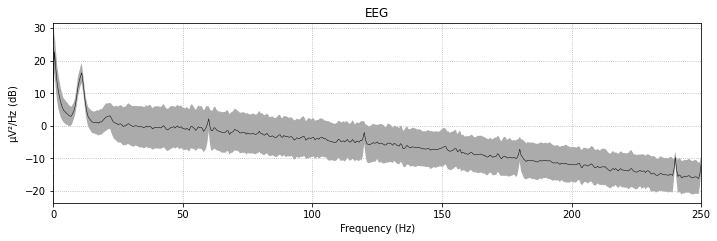

In [44]:
%matplotlib inline
fig = raw.plot_psd(tmax=np.inf, fmax=250.0, average=True) #fmax=raw.info['sfreq']/2

### Heartbeat artifacts (ECG)

In [41]:
# Can be done if ECG channel is present
# ecg_epochs = mne.preprocessing.create_ecg_epochs(raw, ch_name='Pz')
# ecg_epochs.plot_image(combine='mean')

### Ocular artifacts (EOG)

Using EOG channel: VEOG_lower
EOG channel index for this subject is: [32]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10240 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 90 significant peaks
Number of EOG events detected: 90
Not setting metadata
Not setting metadata
90 matching events found
Applying baseline correction (mode: mean)
Loading data for 90 events and 1025 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
90 matc

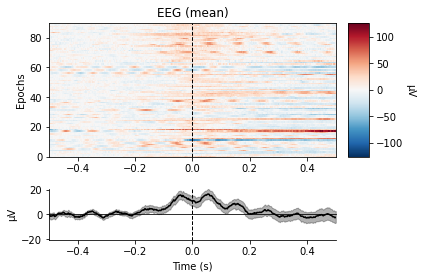

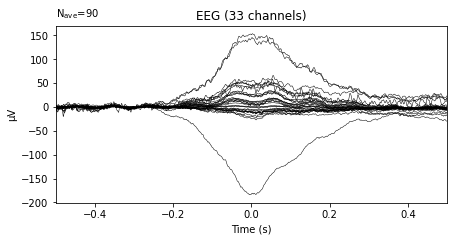

In [27]:
eog_epochs = mne.preprocessing.create_eog_epochs(raw, baseline=(-0.5, -0.2), ch_name='VEOG_lower')
eog_epochs.plot_image(combine='mean')
eog_epochs.average()#.plot_joint()
eog_epochs.average().plot();

Using EOG channels: HEOG_left, HEOG_right
EOG channel index for this subject is: [30 31]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10240 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 92 significant peaks
Number of EOG events detected: 92
Not setting metadata
Not setting metadata
92 matching events found
Applying baseline correction (mode: mean)
Loading data for 92 events and 1025 original time points ...
1 bad epochs dropped
Not setting metadata
Not setting m

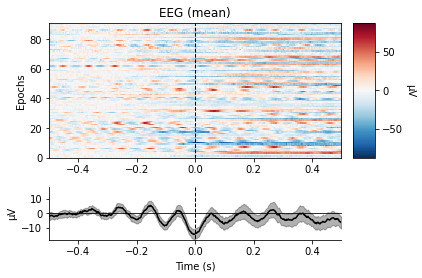

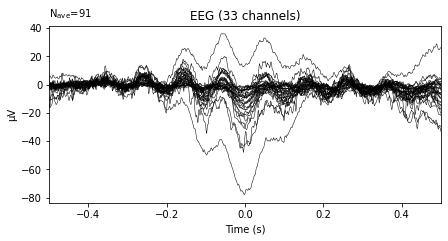

In [36]:
eog_epochs = mne.preprocessing.create_eog_epochs(raw, baseline=(-0.5, -0.2), ch_name=['HEOG_left', 'HEOG_right'])
# eog_epochs = mne.preprocessing.create_eog_epochs(raw, baseline=(-0.5, -0.2), ch_name='HEOG_left')
# eog_epochs = mne.preprocessing.create_eog_epochs(raw, baseline=(-0.5, -0.2), ch_name='HEOG_right')
eog_epochs.plot_image(combine='mean')
eog_epochs.average().plot();

# ICA EEG Club - 08/02/2022
- (1) load the ERP core data, (2) filter it and reference it to the average, (3) run the ICA, (4) plot the ICA components and activation time series, (5) reject component 1 or 1 and 6, (6) plot the data before and after ICA rejection.

In [66]:
# Load data
import os
import numpy as np
import mne

folder_name = 'C:/Users/Dragana/Documents/Python_Scripts/icm_eeg_club/Data_Examples_eeg_club/ERP_Core'
filename = '1_N170.set'
sample_data_raw_file = os.path.join(folder_name, filename)
raw = mne.io.read_raw_eeglab(sample_data_raw_file, preload=True)

Reading C:\Users\Dragana\Documents\Python_Scripts\icm_eeg_club\Data_Examples_eeg_club\ERP_Core\1_N170.fdt
Reading 0 ... 699391  =      0.000 ...   682.999 secs...


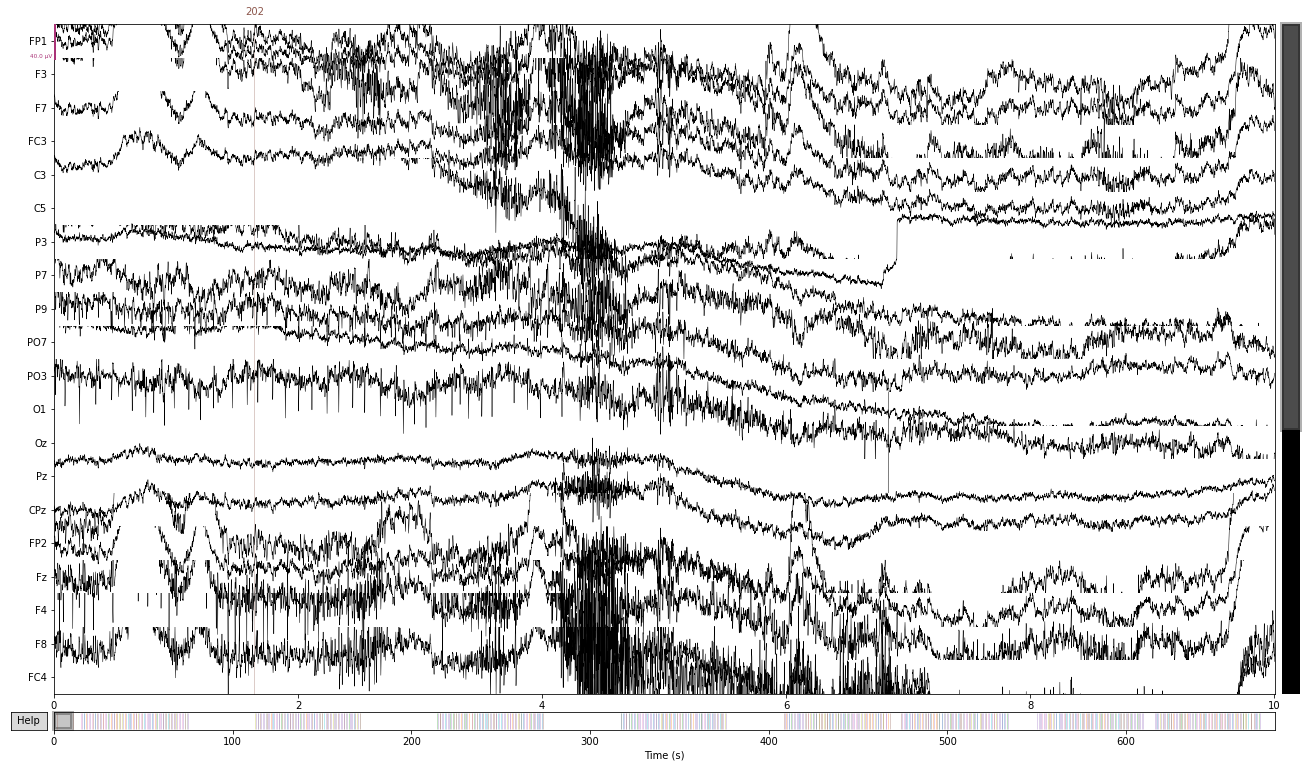

In [67]:
raw.plot();

In [68]:
raw.drop_channels(['FP1', 'FP2', 'HEOG_left', 'HEOG_right', 'VEOG_lower'])

<RawEEGLAB | 1_N170.fdt, 28 x 699392 (683.0 s), ~149.4 MB, data loaded>

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.
Creating RawArray with float64 data, n_channels=90, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


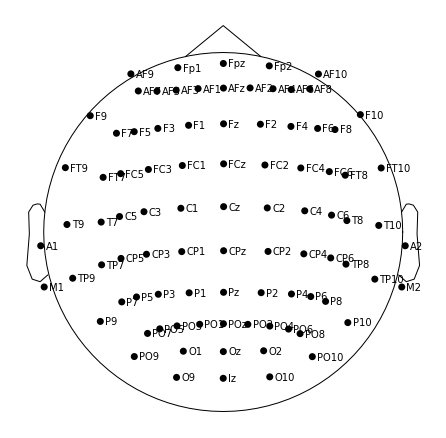

In [69]:
# I added the 1020 montage but it might not be the right one
ten_twenty_montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(ten_twenty_montage)
ten_twenty_montage.plot();

In [70]:
# Filter data & average reference :
# Highpass at 0.1
# Lowpass at 30
# Notch filter at 50
raw.filter(l_freq=0.1, h_freq=30.)
raw.notch_filter(freqs=50)
# use the average of all channels as reference
raw.set_eeg_reference(ref_channels='average')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 33793 samples (33.001 sec)

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwid

<RawEEGLAB | 1_N170.fdt, 28 x 699392 (683.0 s), ~149.4 MB, data loaded>

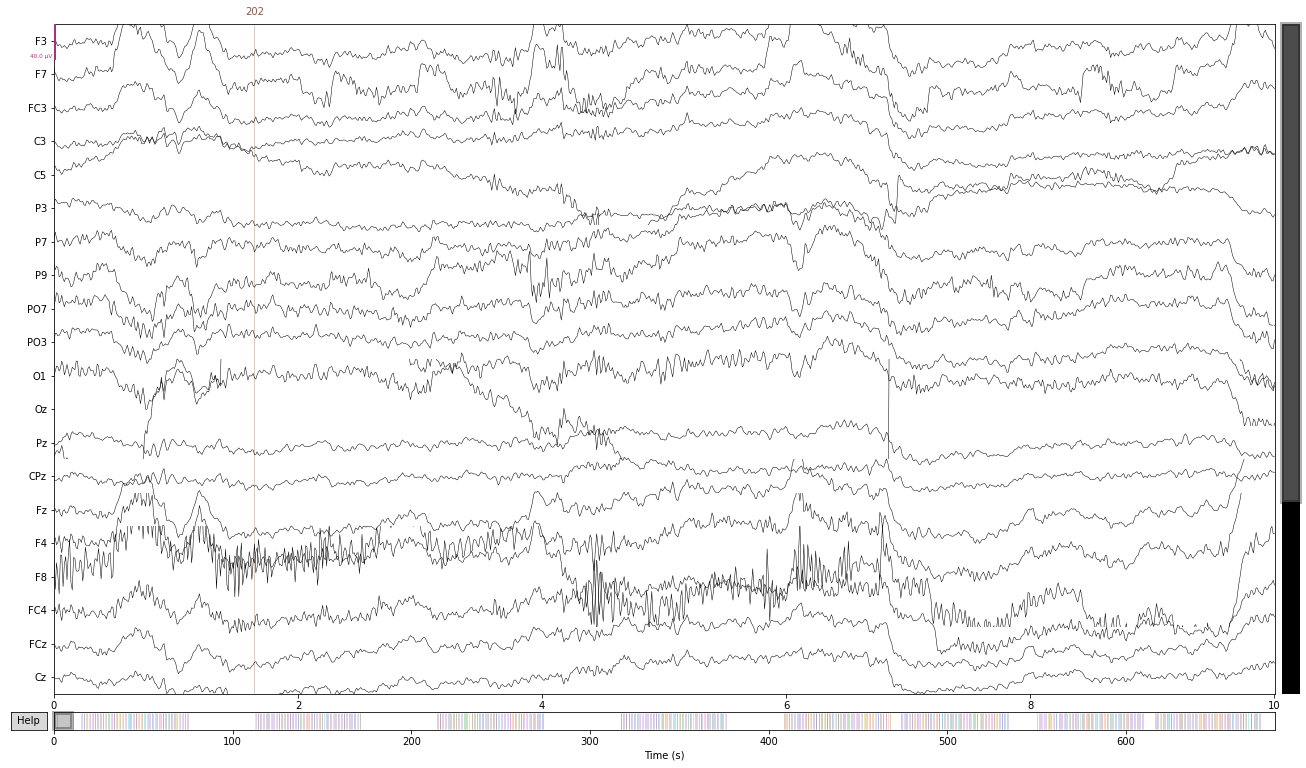

In [71]:
raw.plot();

In [72]:
# ICA
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs,
                               corrmap)
ica = ICA(n_components=0.99, max_iter='auto', random_state=97)
ica.fit(raw)
ica

Fitting ICA to data using 28 channels (please be patient, this may take a while)
Selecting by explained variance: 19 components
Fitting ICA took 35.3s.


Method,fastica
Fit,43 iterations on raw data (699392 samples)
ICA components,19
Explained variance,99.1 %
Available PCA components,28
Channel types,eeg
ICA components marked for exclusion,—


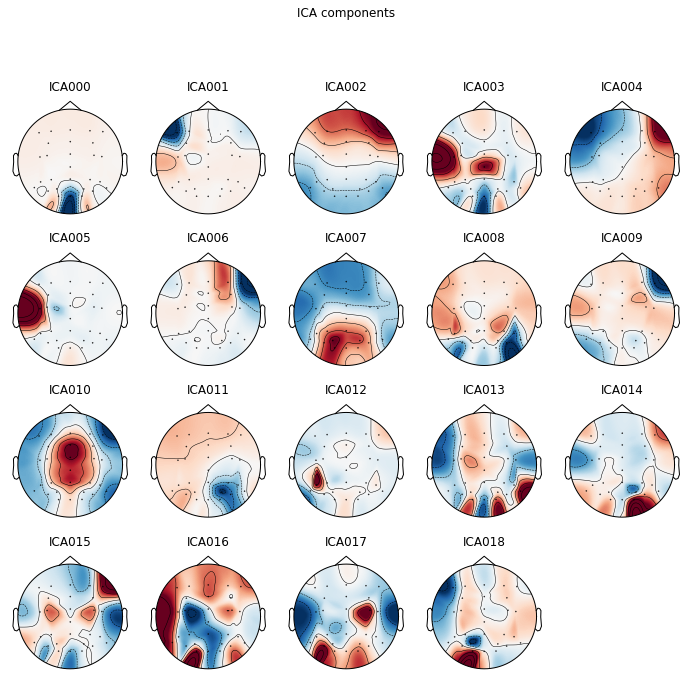

[<MNEFigure size 702x696.24 with 19 Axes>]

In [73]:
ica.plot_components()  # There is a problem with this because there are no channel locations in the EEG file

Applying ICA to Raw instance
    Transforming to ICA space (19 components)
    Zeroing out 1 ICA component
    Projecting back using 28 PCA components


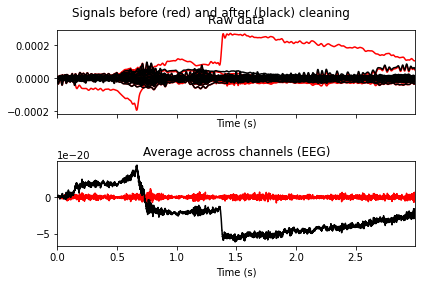

Applying ICA to Raw instance
    Transforming to ICA space (19 components)
    Zeroing out 1 ICA component
    Projecting back using 28 PCA components


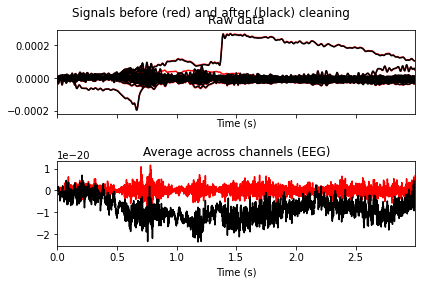

In [74]:
# blinks
ica.plot_overlay(raw, exclude=[0], picks='eeg'); # component 1
# heartbeats
ica.plot_overlay(raw, exclude=[5], picks='eeg'); # component 6

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
341 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
341 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


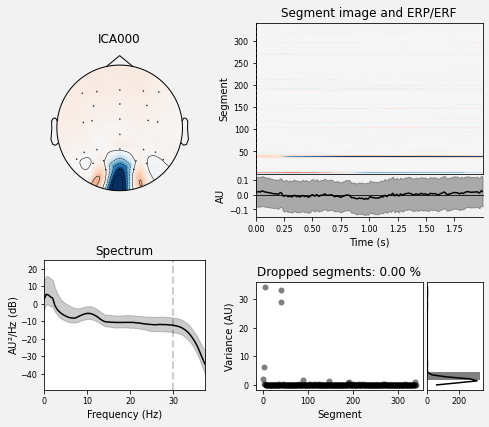

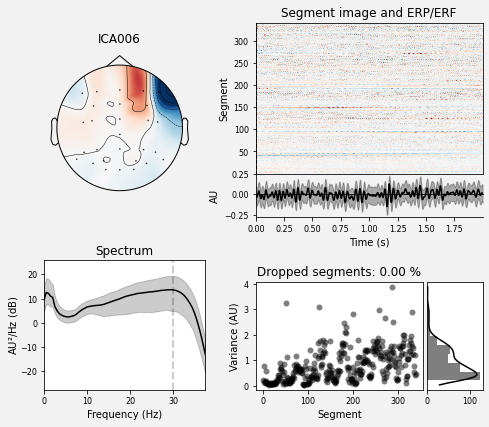

[<Figure size 504x432 with 6 Axes>, <Figure size 504x432 with 6 Axes>]

In [75]:
ica.plot_properties(raw, picks=[0, 6])

Applying ICA to Raw instance
    Transforming to ICA space (19 components)
    Zeroing out 2 ICA components
    Projecting back using 28 PCA components


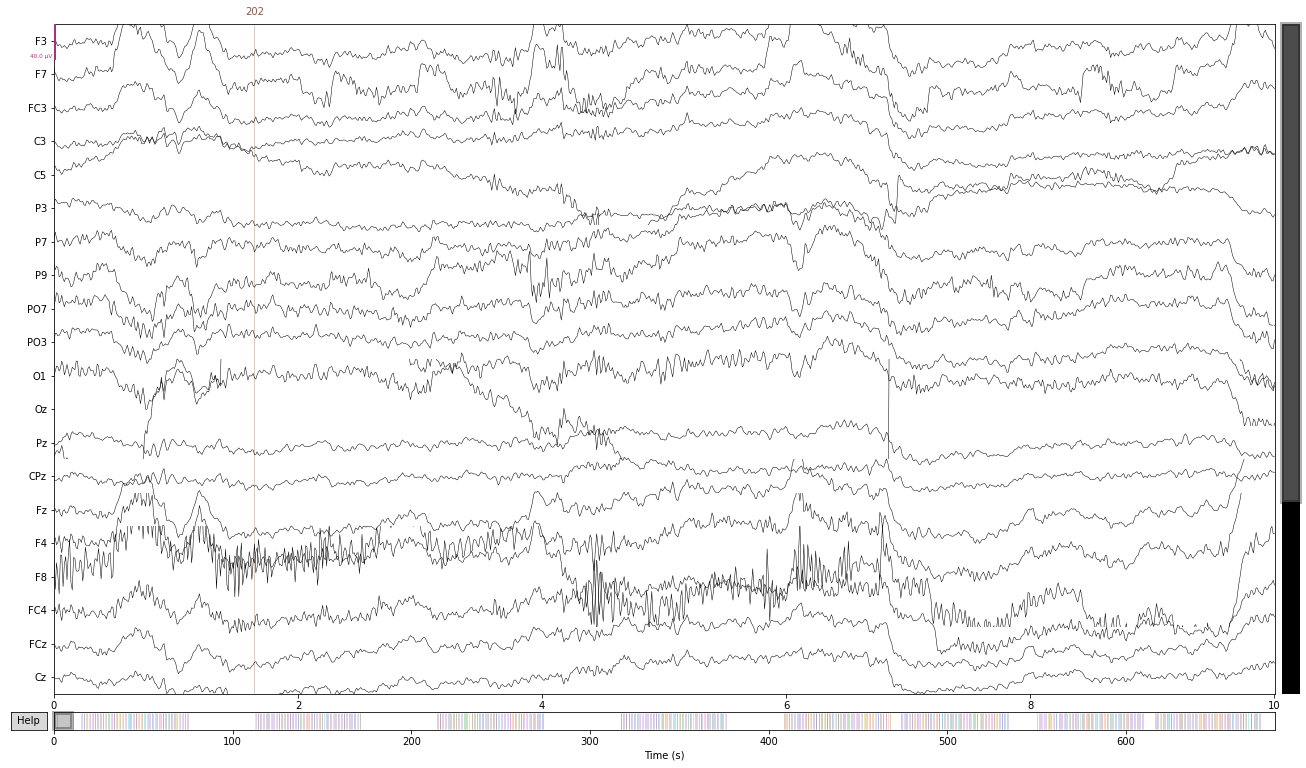

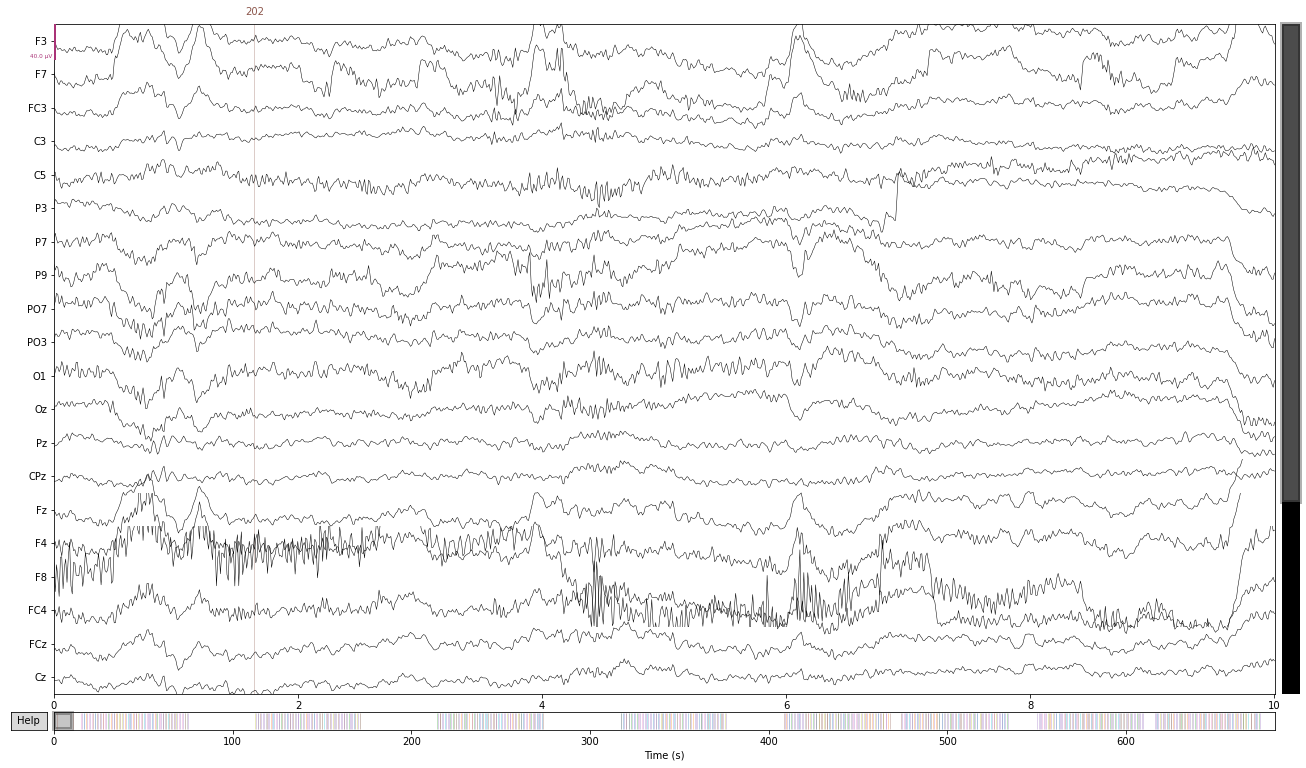

In [76]:
ica.exclude = [0, 5]  
# ica.apply() changes the Raw object in-place, so let's make a copy first:
# raw = mne.io.read_raw_eeglab(sample_data_raw_file, preload=True)
reconst_raw = raw.copy()
ica.apply(reconst_raw)

raw.plot(); #order=artifact_picks, n_channels=len(artifact_picks),show_scrollbars=False)
reconst_raw.plot();#order=artifact_picks, n_channels=len(artifact_picks), show_scrollbars=False)
